# IMDB Film Rating and Ranking

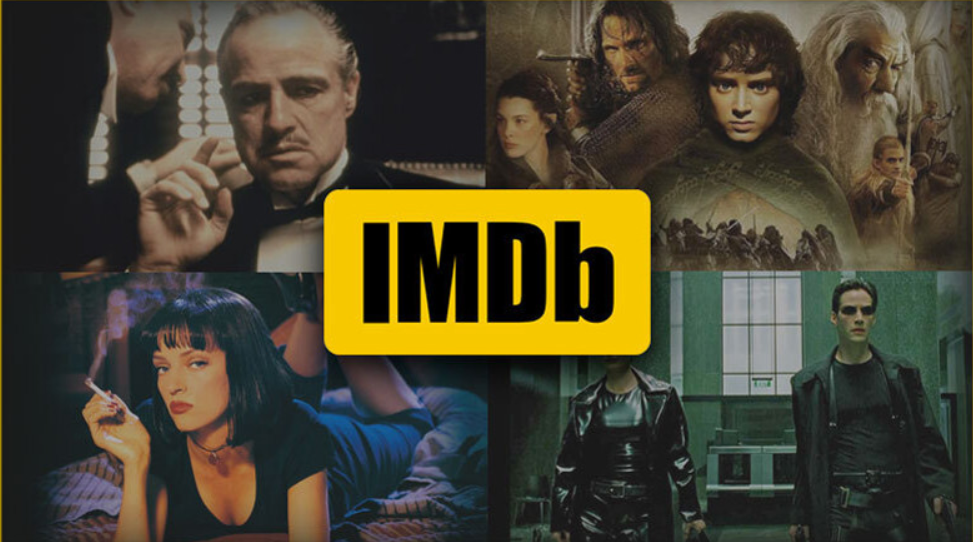

In [1]:
import pandas as pd
import math
import scipy.stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
df = pd.read_csv("/kaggle/input/imdb-film-rating-and-ranking/movies_metadata.csv", low_memory=False)

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df = df[["title", "vote_average", "vote_count"]]

In [5]:
df.shape

(45466, 3)

In [6]:
df.head (3)

,title,vote_average,vote_count
0,Toy Story,7.70000,5415.00000
1,Jumanji,6.90000,2413.00000
2,Grumpier Old Men,6.50000,92.00000


In [7]:
df.sort_values("vote_average", ascending=False).head(10)

,title,vote_average,vote_count
21642,Ice Age Columbus: Who Were the First Americans?,10.00000,1.00000
15710,If God Is Willing and da Creek Don't Rise,10.00000,1.00000
22396,Meat the Truth,10.00000,1.00000
22395,Marvin Hamlisch: What He Did For Love,10.00000,1.00000
35343,Elaine Stritch: At Liberty,10.00000,1.00000
186,Reckless,10.00000,1.00000
45047,The Human Surge,10.00000,1.00000
22377,The Guide,10.00000,1.00000
22346,هیچ کجا هیچ کس,10.00000,1.00000
1634,Other Voices Other Rooms,10.00000,1.00000


In [8]:
df["vote_count"].describe([0.10, 0.25, 0.50, 0.70, 0.80, 0.90, 0.95, 0.99]).T

count   45460.00000
mean      109.89734
std       491.31037
min         0.00000
10%         1.00000
25%         3.00000
50%        10.00000
70%        25.00000
80%        50.00000
90%       160.00000
95%       434.00000
99%      2183.82000
max     14075.00000
Name: vote_count, dtype: float64

In [9]:
df[df["vote_count"] > 400].sort_values("vote_average", ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


,title,vote_average,vote_count
10309,Dilwale Dulhania Le Jayenge,9.10000,661.00000
40251,Your Name.,8.50000,1030.00000
834,The Godfather,8.50000,6024.00000
314,The Shawshank Redemption,8.50000,8358.00000
1152,One Flew Over the Cuckoo's Nest,8.30000,3001.00000
1176,Psycho,8.30000,2405.00000
1178,The Godfather: Part II,8.30000,3418.00000
292,Pulp Fiction,8.30000,8670.00000
1184,Once Upon a Time in America,8.30000,1104.00000
5481,Spirited Away,8.30000,3968.00000


In [10]:
from sklearn.preprocessing import MinMaxScaler

df["vote_count_score"] = MinMaxScaler(feature_range=(1, 10)). \
    fit(df[["vote_count"]]). \
    transform(df[["vote_count"]])

In [11]:
df["average_count_score"] = df["vote_average"] * df["vote_count_score"]

In [12]:
df.sort_values("average_count_score", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score
15480,Inception,8.10000,14075.00000,10.00000,81.00000
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190
17818,The Avengers,7.40000,12000.00000,8.67318,64.18153
14551,Avatar,7.20000,12114.00000,8.74607,62.97174
26564,Deadpool,7.40000,11444.00000,8.31766,61.55065
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388
20051,Django Unchained,7.80000,10297.00000,7.58423,59.15697
23753,Guardians of the Galaxy,7.90000,10014.00000,7.40327,58.48582
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414


In [13]:
df.head (3)

,title,vote_average,vote_count,vote_count_score,average_count_score
0,Toy Story,7.70000,5415.00000,4.46252,34.36142
1,Jumanji,6.90000,2413.00000,2.54295,17.54634
2,Grumpier Old Men,6.50000,92.00000,1.05883,6.88238


# IMDB Weighted Rating

weighted_rating = (v/(v+M) * r) + (M/(v+M) * C)

r = vote average

v = vote count

M = minimum votes required to be listed in the Top 250

C = the mean vote across the whole report (currently 7.0)

In [14]:
M = 2500
C = df['vote_average'].mean()

def weighted_rating(r, v, M, C):
    return (v / (v + M) * r) + (M / (v + M) * C)

In [15]:
df["weighted_rating"] = weighted_rating(df["vote_average"],
                                        df["vote_count"], M, C)

In [16]:
df.sort_values("weighted_rating", ascending=False).head(10)

,title,vote_average,vote_count,vote_count_score,average_count_score,weighted_rating
12481,The Dark Knight,8.30000,12269.00000,8.84519,73.41505,7.84604
314,The Shawshank Redemption,8.50000,8358.00000,6.34437,53.92714,7.83648
2843,Fight Club,8.30000,9678.00000,7.18842,59.66388,7.74946
15480,Inception,8.10000,14075.00000,10.00000,81.00000,7.72567
292,Pulp Fiction,8.30000,8670.00000,6.54387,54.31414,7.69978
834,The Godfather,8.50000,6024.00000,4.85194,41.24146,7.65480
22879,Interstellar,8.10000,11187.00000,8.15332,66.04190,7.64669
351,Forrest Gump,8.20000,8147.00000,6.20945,50.91748,7.59377
7000,The Lord of the Rings: The Return of the King,8.10000,8226.00000,6.25996,50.70571,7.52155
4863,The Lord of the Rings: The Fellowship of the Ring,8.00000,8892.00000,6.68583,53.48661,7.47731


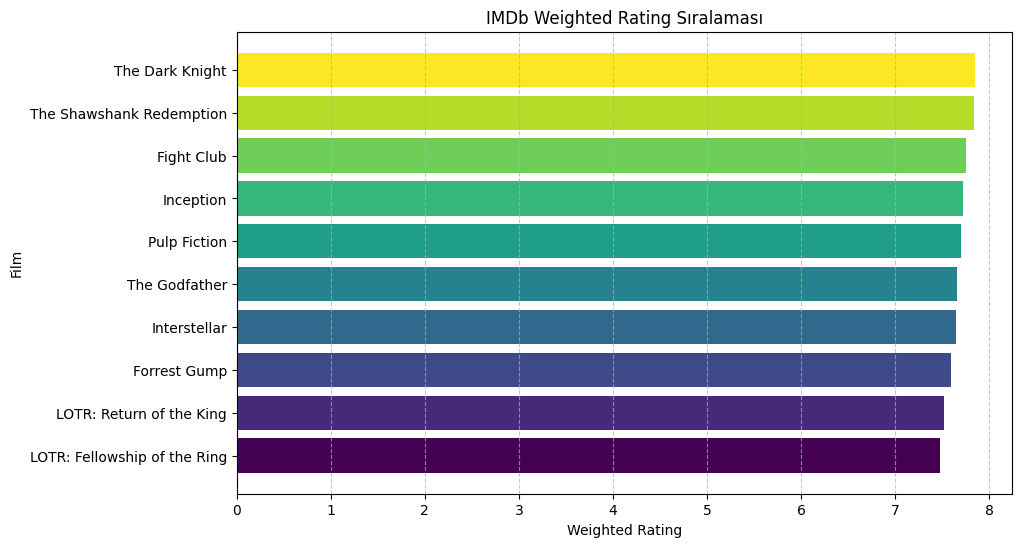

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Veriyi oluştur
data = {
    "Title": [
        "The Dark Knight", "The Shawshank Redemption", "Fight Club", "Inception", 
        "Pulp Fiction", "The Godfather", "Interstellar", "Forrest Gump", 
        "LOTR: Return of the King", "LOTR: Fellowship of the Ring"
    ],
    "Weighted Rating": [7.84604, 7.83648, 7.74946, 7.72567, 7.69978, 7.65480, 7.64669, 7.59377, 7.52155, 7.47731]
}

df = pd.DataFrame(data)

# Filmleri weighted_rating'e göre sırala
df = df.sort_values(by="Weighted Rating", ascending=True)

# Renk paleti oluştur (her sütun için farklı renk)
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

# Grafik oluştur
plt.figure(figsize=(10, 6))
bars = plt.barh(df["Title"], df["Weighted Rating"], color=colors)

# Grafik detayları
plt.xlabel("Weighted Rating")
plt.ylabel("Film")
plt.title("IMDb Weighted Rating Sıralaması")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Grafiği göster
plt.show()

# Bayesian Average Rating Score

In [18]:
def bayesian_average_rating(n, confidence=0.95):
    import math
    import scipy.stats as st

    if sum(n) == 0:
        return 0
    K = len(n)
    z = st.norm.ppf(1 - (1 - confidence) / 2)
    N = sum(n)
    first_part = 0.0
    second_part = 0.0
    for k in range(K):  # enumerate yerine range kullan
        first_part += (k + 1) * (n.iloc[k] + 1) / (N + K)
        second_part += (k + 1) * (k + 1) * (n.iloc[k] + 1) / (N + K)
    score = first_part - z * math.sqrt((second_part - first_part * first_part) / (N + K + 1))
    return score

In [19]:
df = pd.read_csv("/kaggle/input/imbd-ratings/imdb_ratings.csv")
df = df.iloc[0:, 1:]

In [20]:
df.head ()

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one
0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733
1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128
2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469
3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345
4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318


In [21]:
df.shape

(250, 13)

In [22]:
df["bar_score"] = df.apply(lambda x: bayesian_average_rating(x[["one", "two", "three", "four", "five",
                                                                "six", "seven", "eight", "nine", "ten"]]), axis=1)

In [23]:
df.sort_values("bar_score", ascending=False).head(10)

,id,movieName,rating,ten,nine,eight,seven,six,five,four,three,two,one,bar_score
0,111161,1. The Shawshank Redemption (1994),9.20000,1295382,600284,273091,87368,26184,13515,6561,4704,4355,34733,9.14539
1,68646,2. The Godfather (1972),9.10000,837932,402527,199440,78541,30016,16603,8419,6268,5879,37128,8.94002
3,468569,4. The Dark Knight (2008),9.00000,1034863,649123,354610,137748,49483,23237,11429,8082,7173,30345,8.89596
2,71562,3. The Godfather: Part II (1974),9.00000,486356,324905,175507,70847,26349,12657,6210,4347,3892,20469,8.81250
4,50083,5. 12 Angry Men (1957),8.90000,246765,225437,133998,48341,15773,6278,2866,1723,1478,8318,8.76793
6,167260,7. The Lord of the Rings: The Return of ...,8.90000,703093,433087,270113,117411,44760,21818,10873,7987,6554,28990,8.75204
5,108052,6. Schindler's List (1993),8.90000,453906,383584,220586,82367,27219,12922,6234,4572,4289,19328,8.74361
11,109830,12. Forrest Gump (1994),8.80000,622104,553654,373644,151284,51140,22720,11692,7647,5941,12110,8.69915
12,1375666,13. Inception (2010),8.70000,724798,627987,408686,174229,60668,26910,13436,8703,6932,17621,8.69315
10,137523,11. Fight Club (1999),8.80000,637087,572654,371752,152295,53059,24755,12648,8606,6948,17435,8.67448


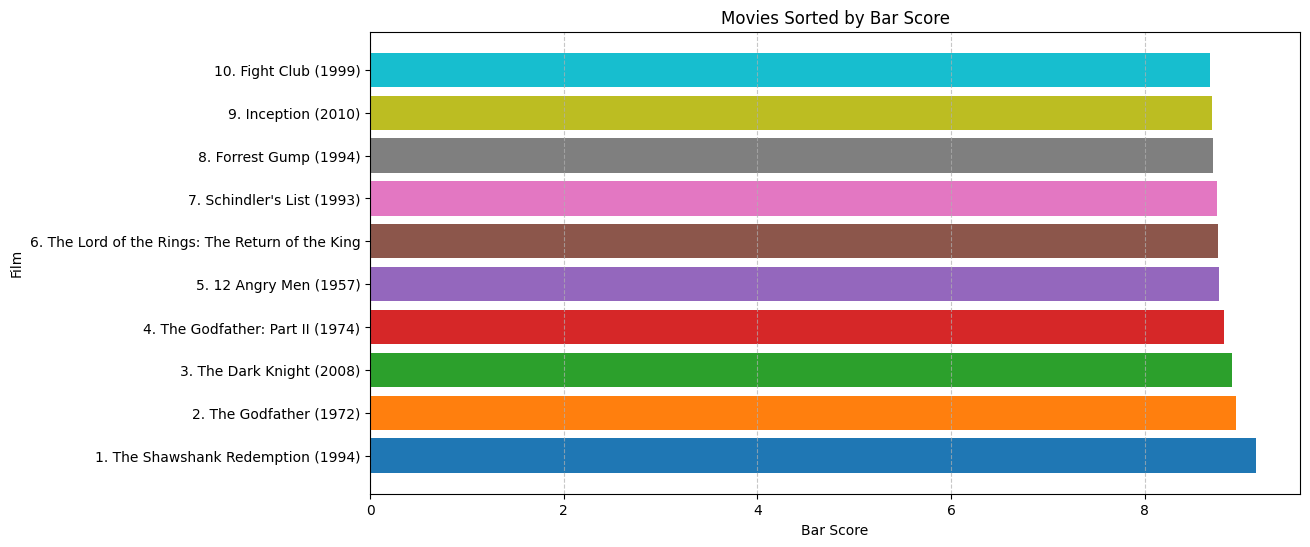

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Veriyi oluştur
data = {
    "movieName": [
        "1. The Shawshank Redemption (1994)", "2. The Godfather (1972)", "3. The Dark Knight (2008)",
        "4. The Godfather: Part II (1974)", "5. 12 Angry Men (1957)", "6. The Lord of the Rings: The Return of the King",
        "7. Schindler's List (1993)", "8. Forrest Gump (1994)", "9. Inception (2010)", "10. Fight Club (1999)"
    ],
    "bar_score": [9.14539, 8.94002, 8.89596, 8.81250, 8.76793, 8.75204, 8.74361, 8.69915, 8.69315, 8.67448]
}

df = pd.DataFrame(data)

# Veriyi bar_score'a göre büyükten küçüğe sırala
df = df.sort_values(by="bar_score", ascending=False)

# Renk paleti oluştur (her sütun için farklı renk)
colors = plt.cm.tab10(np.linspace(0, 1, len(df)))

# Grafik oluştur
plt.figure(figsize=(12, 6))
bars = plt.barh(df["movieName"], df["bar_score"], color=colors)

# Grafik detayları
plt.xlabel("Bar Score")
plt.ylabel("Film")
plt.title("Movies Sorted by Bar Score")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Grafiği göster
plt.show()
